# Практика

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

## Выбор и описание непрерывного распределения

[Описание Гамма-распределения на Wikipedia](https://ru.wikipedia.org/wiki/Гамма-распределение)

$f_X(x) = x^{k-1} \frac{e^{-x/\theta}}{\theta^k \Gamma(k)}, x \ge 0, k > 0,$ где $\Gamma(k)$ - [Гамма функция](https://ru.wikipedia.org/wiki/Гамма-функция)

Формулы для расчёта :
- теоретического мат ожидания: $k \theta$
- теоретической дисперсии: $k \theta^2$
- теоретической плтности распределения случайной величины:  $\frac{1}{\Gamma(k) \theta^k} x^{k-1} e^{-x/\theta}$


### Сгенерируйте примеры из распределения

In [123]:
class a_gamma:
    """Гамма распределение"""
   
    def s_mean(x: np.array):
        _sum, _cnt = 0, 0
        for val in x:
            _sum += val
            _cnt += 1
        return _sum/_cnt
    
      
    def s_var(x: np.array):
        mean = a_gamma.s_mean(x)
        _sum, _cnt = 0, 0
        for val in x:
            _sum += pow(val - mean, 2)
            _cnt += 1
        return _sum/_cnt
        
  
    def t_mean(k, theta):
        """Теоретическое мат.ожидание"""
        return k*theta

    
    def t_var(k, theta):
        """Теоретическая дисперсия"""
        return k*pow(theta,2)
    
   
    def t_pdf(x: np.array, k, theta):
        """Теоретическая плoтность распределения случайной величины"""
        return 1/(G(k)*np.power(theta, k))*np.power(x, k-1)*np.exp(-x/theta)


### Постройте гистограмму выборки и теоретическую плотность распределения

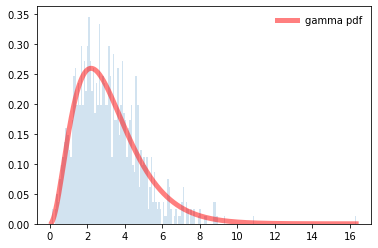

In [124]:
from scipy.stats import gamma, norm
from math import sqrt
# построим Гамма-распределение с параметрами
k = 3.2
theta = 1
var = a_gamma.t_var(k, theta)
std = sqrt(var)
mean = a_gamma.t_mean(k, theta)

#Сгенерируем из него выборку объёма 1000
r = gamma.rvs(k, size=1000)
fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=200) #построим из него гистограмму

x = np.linspace(np.min(r),
                np.max(r), 1000)


ax.plot(x, a_gamma.t_pdf(x, k, theta),
       'r-', lw=5, alpha=0.5, label='gamma pdf')

ax.legend(loc='best', frameon=False)
plt.show()

### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

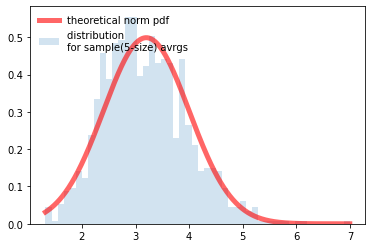

Математическое ожидание для выборочного среднего: 3.1899
Дисперсия исходной случайной величины через дисперсию выборочного среднего: 3.1373
Дисперсия исходной случайной величины: 3.2000
Математическое ожидание исходной случайной величины: 3.2000
Математическое ожидание нормального распределения: 3.2000


In [125]:
_size = 5
# 1000 выборок размер _size из случайной величины с Гамма-распредлеением
m = []
for i in range(1000):
    m.append(a_gamma.s_mean(gamma.rvs(k, size=_size)))
m = np.array(m)

#Стандартное отклонение для выборки m построенная по дисперсии исходной случайной величины
std = sqrt(var/_size)

fig, ax = plt.subplots(1, 1)
# диапазон изменения значений случайных величин
x = np.linspace(np.min(m),
                np.max(m), 1000)

# 
ax.plot(x, norm.pdf(x, loc=mean, scale=std),
        'r-', lw=5, alpha=0.6, label='theoretical norm pdf')

ax.hist(m, density=True, histtype='stepfilled', alpha=0.2, bins=50, label=f'distribution \nfor sample({_size}-size) avrgs')
ax.legend(loc='upper left', frameon=False)

plt.show()
print(f"Математическое ожидание для выборочного среднего: {a_gamma.s_mean(m):0.4f}")
print(f"Дисперсия исходной случайной величины через дисперсию выборочного среднего: {a_gamma.s_var(m) * _size:0.4f}")
print(f"Дисперсия исходной случайной величины: {var:0.4f}")
print(f"Математическое ожидание исходной случайной величины: {mean:0.4f}")
print(f"Математическое ожидание нормального распределения: {norm.mean(loc=mean, scale=std):0.4f}")

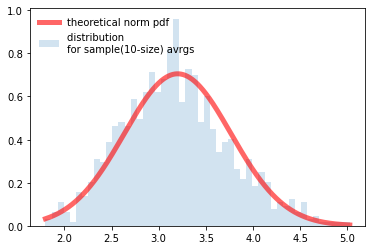

Математическое ожидание для выборочного среднего: 3.1799
Дисперсия исходной случайной величины через дисперсию выборочного среднего: 3.1863
Дисперсия исходной случайной величины: 3.2000
Математическое ожидание исходной случайной величины: 3.2000
Математическое ожидание нормального распределения: 3.2000


In [131]:
_size = 10
# 1000 выборок размер _size из случайной величины с Гамма-распредлеением
m = []
for i in range(1000):
    m.append(a_gamma.s_mean(gamma.rvs(k, size=_size)))
m = np.array(m)

#Стандартное отклонение для выборки m построенная по дисперсии исходной случайной величины
std = sqrt(var/_size)

fig, ax = plt.subplots(1, 1)
# диапазон изменения значений случайных величин
x = np.linspace(np.min(m),
                np.max(m), 1000)

# 
ax.plot(x, norm.pdf(x, loc=mean, scale=std),
        'r-', lw=5, alpha=0.6, label='theoretical norm pdf')

ax.hist(m, density=True, histtype='stepfilled', alpha=0.2, bins=50, label=f'distribution \nfor sample({_size}-size) avrgs')
ax.legend(loc='upper left', frameon=False)

plt.show()
print(f"Математическое ожидание для выборочного среднего: {a_gamma.s_mean(m):0.4f}")
print(f"Дисперсия исходной случайной величины через дисперсию выборочного среднего: {a_gamma.s_var(m) * _size:0.4f}")
print(f"Дисперсия исходной случайной величины: {var:0.4f}")
print(f"Математическое ожидание исходной случайной величины: {mean:0.4f}")
print(f"Математическое ожидание нормального распределения: {norm.mean(loc=mean, scale=std):0.4f}")

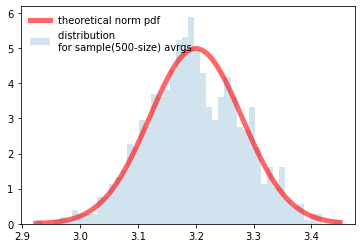

Математическое ожидание для выборочного среднего: 3.1977
Дисперсия исходной случайной величины через дисперсию выборочного среднего: 3.4322
Дисперсия исходной случайной величины: 3.2000
Математическое ожидание исходной случайной величины: 3.2000
Математическое ожидание нормального распределения: 3.2000


In [127]:
_size = 500
# 1000 выборок размер _size из случайной величины с Гамма-распредлеением
m = []
for i in range(1000):
    m.append(a_gamma.s_mean(gamma.rvs(k, size=_size)))
m = np.array(m)

#Стандартное отклонение для выборки m построенная по дисперсии исходной случайной величины
std = sqrt(var/_size)

fig, ax = plt.subplots(1, 1)
# диапазон изменения значений случайных величин
x = np.linspace(np.min(m),
                np.max(m), 1000)

# 
ax.plot(x, norm.pdf(x, loc=mean, scale=std),
        'r-', lw=5, alpha=0.6, label='theoretical norm pdf')

ax.hist(m, density=True, histtype='stepfilled', alpha=0.2, bins=50, label=f'distribution \nfor sample({_size}-size) avrgs')
ax.legend(loc='upper left', frameon=False)

plt.show()
print(f"Математическое ожидание для выборочного среднего: {a_gamma.s_mean(m):0.4f}")
print(f"Дисперсия исходной случайной величины через дисперсию выборочного среднего: {a_gamma.s_var(m) * _size:0.4f}")
print(f"Дисперсия исходной случайной величины: {var:0.4f}")
print(f"Математическое ожидание исходной случайной величины: {mean:0.4f}")
print(f"Математическое ожидание нормального распределения: {norm.mean(loc=mean, scale=std):0.4f}")

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**С ростом кол-ва элементов выборки случайной величины повышается точность аппроксимации распределения выборочных средних нормальным распределением $N(\mathbb{E}X, \mathbb{D}X/n)$.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [127]:
import numpy as np
import pandas as pd
import scipy
from statsmodels.stats.weightstats import _zconfint_generic
from sklearn import model_selection as cross_validation
from sklearn import datasets, linear_model, metrics

## Загрузка данных

In [128]:
df = pd.read_csv('telecom_churn.csv', header=0)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [130]:
df['total day calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: total day calls, dtype: float64

In [164]:
df['churn'].astype('int64').describe()

count    3333.000000
mean        0.144914
std         0.352067
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn, dtype: float64

In [243]:
df['call_cohorts'] = pd.cut(df['total day calls'], 5)
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,call_cohorts
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,"(99.0, 132.0]"
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,"(99.0, 132.0]"
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,"(99.0, 132.0]"
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,"(66.0, 99.0]"
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,"(99.0, 132.0]"
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False,"(66.0, 99.0]"
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,29.62,212.6,118,9.57,7.5,7,2.03,3,False,"(66.0, 99.0]"
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,8.76,211.8,96,9.53,7.1,6,1.92,0,False,"(66.0, 99.0]"
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,"(66.0, 99.0]"
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,18.87,326.4,97,14.69,11.2,5,3.02,0,False,"(66.0, 99.0]"


<AxesSubplot:xlabel='call_cohorts'>

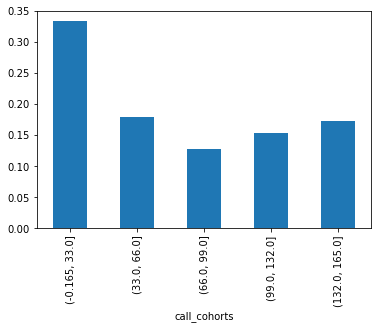

In [295]:
percentage_by_call = df.groupby('call_cohorts')['churn'].mean()
percentage_by_call.plot.bar()

In [285]:
percentage_mean_delta = percentage_by_call - percentage_by_call.mean()

Text(1.22, 0.1, 'Mean churns: 0.19')

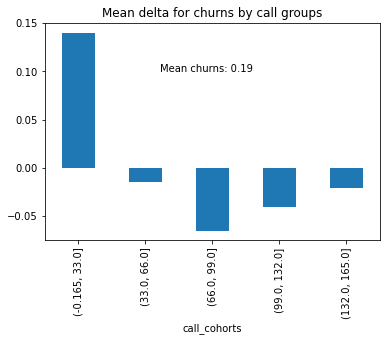

In [252]:
percentage_mean_delta.plot.bar(title='Mean delta for churns by call groups')
plt.text(1.22, 0.1, 'Mean churns: {:.2f}'.format(percentage_by_call.mean()))

In [162]:
_var = df['churn'].var()
print(f"Несмещенная оценка дисперсии (ddof=1): {_var:0.3f}")

Несмещенная оценка дисперсии (ddof=1): 0.124


In [327]:
cohort = df[df['call_cohorts'] == pd.Interval(66.0, 99.0, closed='right')]
cohort.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,call_cohorts
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,"(66.0, 99.0]"
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False,"(66.0, 99.0]"
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,29.62,212.6,118,9.57,7.5,7,2.03,3,False,"(66.0, 99.0]"
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,8.76,211.8,96,9.53,7.1,6,1.92,0,False,"(66.0, 99.0]"
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,"(66.0, 99.0]"


In [328]:
cohort.shape

(1432, 22)

#### Явный расчет для z-интервал

Построим доверительный интервал для средней по выборочной совокупности по формуле $$\bar{X}_n \pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

In [329]:
norm_rv = sts.norm(0, 1)
alpha = 0.05
z = norm_rv.ppf(1-alpha/2)

std_err =  math.sqrt(_var/cohort.shape[0])
mu = cohort['churn'].mean()
print(f"доверительный интервал (95%%) для churn model: ({mu - z * std_err:0.6f}, {mu + z * std_err:0.6f})")

доверительный интервал (95%%) для churn model: (0.110257, 0.146726)


#### Расчет для z-интервала с помощью функции _zconfint_generic

In [330]:
_res = _zconfint_generic(mu, std_err, 0.05, 'two-sided')
print(f"доверительный интервал (95%%) для churn model({_res[0]:0.6f}, {_res[1]:0.6f})")

доверительный интервал (95%%) для churn model(0.110257, 0.146726)


#### Сравним результаты:

In [333]:
print(f"Результат для левой границы отличаетcя на: {_res[0] - (mu - z * std_err)}")
print(f"Результат для правой границы отличаетcя на: {_res[1] - (mu + z * std_err)}")

Результат для левой границы отличаетcя на: 0.0
Результат для правой границы отличаетcя на: 0.0


#### Посчитаем доверительный интервал для всех когорт

In [334]:
_var = df['churn'].var()
for interval in df.groupby('call_cohorts').size().index:
    print(interval)
    cohort = df[df['call_cohorts'] == interval]
    
    std_err =  math.sqrt(_var/cohort.shape[0])
    mu = cohort['churn'].mean()
    
    _res = _zconfint_generic(mu, std_err, 0.05, 'two-sided')
    
    print(f" - доверительный интервал (95%%) для churn model({_res[0]:0.6f}, {_res[1]:0.6f})")

(-0.165, 33.0]
 - доверительный интервал (95%%) для churn model(-0.065061, 0.731728)
(33.0, 66.0]
 - доверительный интервал (95%%) для churn model(0.122653, 0.234963)
(66.0, 99.0]
 - доверительный интервал (95%%) для churn model(0.110257, 0.146726)
(99.0, 132.0]
 - доверительный интервал (95%%) для churn model(0.135549, 0.170469)
(132.0, 165.0]
 - доверительный интервал (95%%) для churn model(0.122240, 0.223706)
